In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import ttest_1samp,ttest_ind
from statsmodels.stats import weightstats as stests
from scipy.stats import iqr

In [2]:
df=pd.read_csv("Wholesale+Customers+Data.csv")

In [4]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [6]:
df.isnull().values.any()

False

In [7]:
df_variety= df.drop("Buyer/Spender",1)

In [8]:
df_variety.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


In [9]:
df_variety["Row Total"] = df_variety.sum(axis=1)
df_variety.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Row Total
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [10]:
df_channel = df_variety.groupby("Channel").sum()
df_channel
#print("The Channel spent most is : {0}".format(min (df_channel['Row Total']))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Row Total
Channel,,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955,7999569
Retail,1264414,1521743,2317845,234671,1032270,248988,6619931


In [11]:
df_region = df_variety.groupby("Region").sum()
df_region

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Row Total
Region,,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327,2386813
Oporto,464721,239144,433274,190132,173311,54506,1555088
Other,3960577,1888759,2495251,930492,890410,512110,10677599


In [12]:
df_1 = df_variety.groupby("Channel")

In [13]:
def minmaxdiff(x):
           return np.max(x) - np.min(x)


In [14]:
df_1.skew()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Row Total
Channel,,,,,,,
Hotel,2.512084,4.660186,2.118316,5.211448,2.857124,11.521808,3.543326
Retail,1.593948,3.413169,2.980945,2.526896,2.612425,3.772841,2.987521


In [44]:
df_1["Fresh"].describe()


,count,mean,std,min,25%,50%,75%,max
Channel,,,,,,,,
Hotel,298.0,13475.560403,13831.687502,3.0,4070.25,9581.5,18274.75,112151.0
Retail,142.0,8904.323944,8987.714750,18.0,2347.75,5993.5,12229.75,44466.0


In [17]:
df_1["Milk"].describe()

,count,mean,std,min,25%,50%,75%,max
Channel,,,,,,,,
Hotel,298.0,3451.724832,4352.165571,55.0,1164.5,2157.0,4029.50,43950.0
Retail,142.0,10716.500000,9679.631351,928.0,5938.0,7812.0,12162.75,73498.0


In [18]:
df_1["Grocery"].describe()

,count,mean,std,min,25%,50%,75%,max
Channel,,,,,,,,
Hotel,298.0,3962.137584,3545.513391,3.0,1703.75,2684.0,5076.75,21042.0
Retail,142.0,16322.852113,12267.318094,2743.0,9245.25,12390.0,20183.50,92780.0


In [19]:
df_1["Frozen"].describe()


,count,mean,std,min,25%,50%,75%,max
Channel,,,,,,,,
Hotel,298.0,3748.251678,5643.912500,25.0,830.00,2057.5,4558.75,60869.0
Retail,142.0,1652.612676,1812.803662,33.0,534.25,1081.0,2146.75,11559.0


In [20]:
df_1["Detergents_Paper"].describe()

,count,mean,std,min,25%,50%,75%,max
Channel,,,,,,,,
Hotel,298.0,790.560403,1104.093673,3.0,183.25,385.5,899.5,6907.0
Retail,142.0,7269.507042,6291.089697,332.0,3683.50,5614.5,8662.5,40827.0


In [21]:
df_1["Delicatessen"].describe()

,count,mean,std,min,25%,50%,75%,max
Channel,,,,,,,,
Hotel,298.0,1415.956376,3147.426922,3.0,379.00,821.0,1548.0,47943.0
Retail,142.0,1753.436620,1953.797047,3.0,566.75,1350.0,2156.0,16523.0


In [22]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 

In [45]:
df_1.apply(cv)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Row Total
Channel,,,,,,,
Hotel,102.642763,126.086689,89.484863,150.574534,139.659622,222.282761,82.568474
Retail,100.936520,90.324559,75.154256,109.693196,86.540802,111.426728,62.950128


In [40]:
df_1.cov()

Fresh          Milk       Grocery  \
Channel                                                              
Hotel   Fresh             1.913156e+08  1.484039e+07  1.155690e+07   
        Milk              1.484039e+07  1.894135e+07  9.298710e+06   
        Grocery           1.155690e+07  9.298710e+06  1.257067e+07   
        Frozen            2.621146e+07  1.004335e+07  5.176321e+06   
        Detergents_Paper -1.138710e+05  1.200992e+06  2.145355e+06   
        Delicatessen      1.108078e+07  8.624927e+06  4.986764e+06   
        Row Total         2.548912e+08  6.294972e+07  4.573472e+07   
Retail  Fresh             8.077902e+07  2.060149e+07  9.760788e+06   
        Milk              2.060149e+07  9.369526e+07  7.821065e+07   
        Grocery           9.760788e+06  7.821065e+07  1.504871e+08   
        Frozen            4.374357e+06  3.060973e+06  9.916477e+05   
        Detergents_Paper  1.299662e+06  3.787391e+07  7.129703e+07   
        Delicatessen      4.884133e+06  6.493880e+06  3.797502e+06   
        Row Total         1.216994e+08  2.399362e+08  3.145447e+08   

                                Frozen  Detergents_Paper  Delicatessen  \
Channel                                                                  
Hotel   Fresh             2.621146e+07     -1.138710e+05  1.108078e+07   
        Milk              1.004335e+07      1.200992e+06  8.624927e+06   
        Grocery           5.176321e+06      2.145355e+06  4.986764e+06   
        Frozen            3.185375e+07     -1.944282e+05  7.608778e+06   
        Detergents_Paper -1.944282e+05      1.219023e+06  2.702777e+05   
        Delicatessen      7.608778e+06      2.702777e+05  9.906296e+06   
        Row Total         8.069924e+07      4.527349e+06  4.247782e+07   
Retail  Fresh             4.374357e+06      1.299662e+06  4.884133e+06   
        Milk              3.060973e+06      3.787391e+07  6.493880e+06   
        Grocery           9.916477e+05      7.129703e+07  3.797502e+06   
        Frozen            3.286257e+06      1.920210e+05  1.119771e+06   
        Detergents_Paper  1.920210e+05      3.957781e+07  8.400858e+05   
        Delicatessen      1.119771e+06      8.400858e+05  3.817323e+06   
        Row Total         1.302503e+07      1.510805e+08  2.095270e+07   

                             Row Total  
Channel                                 
Hotel   Fresh             2.548912e+08  
        Milk              6.294972e+07  
        Grocery           4.573472e+07  
        Frozen            8.069924e+07  
        Detergents_Paper  4.527349e+06  
        Delicatessen      4.247782e+07  
        Row Total         4.912801e+08  
Retail  Fresh             1.216994e+08  
        Milk              2.399362e+08  
        Grocery           3.145447e+08  
        Frozen            1.302503e+07  
        Detergents_Paper  1.510805e+08  
        Delicatessen      2.095270e+07  
        Row Total         8.612386e+08

In [25]:
df_2 = df_variety.groupby("Region")

In [26]:
df_2["Fresh"].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Lisbon,77.0,11101.727273,11557.438575,18.0,2806.00,7363.0,15218.0,56083.0
Oporto,47.0,9887.680851,8387.899211,3.0,2751.50,8090.0,14925.5,32717.0
Other,316.0,12533.471519,13389.213115,3.0,3350.75,8752.5,17406.5,112151.0


In [28]:
df_2["Milk"].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Lisbon,77.0,5486.415584,5704.856079,258.0,1372.0,3748.0,7503.00,28326.0
Oporto,47.0,5088.170213,5826.343145,333.0,1430.5,2374.0,5772.50,25071.0
Other,316.0,5977.085443,7935.463443,55.0,1634.0,3684.5,7198.75,73498.0


In [29]:
df_2["Grocery"].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Lisbon,77.0,7403.077922,8496.287728,489.0,2046.0,3838.0,9490.00,39694.0
Oporto,47.0,9218.595745,10842.745314,1330.0,2792.5,6114.0,11758.50,67298.0
Other,316.0,7896.363924,9537.287778,3.0,2141.5,4732.0,10559.75,92780.0


In [31]:
df_2["Frozen"].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Lisbon,77.0,3000.337662,3092.143894,61.0,950.00,1801.0,4324.00,18711.0
Oporto,47.0,4045.361702,9151.784954,131.0,811.50,1455.0,3272.00,60869.0
Other,316.0,2944.594937,4260.126243,25.0,664.75,1498.0,3354.75,36534.0


In [30]:
df_2["Detergents_Paper"].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Lisbon,77.0,2651.116883,4208.462708,5.0,284.00,737.0,3593.00,19410.0
Oporto,47.0,3687.468085,6514.717668,15.0,282.50,811.0,4324.50,38102.0
Other,316.0,2817.753165,4593.051613,3.0,251.25,856.0,3875.75,40827.0


In [32]:
df_2["Delicatessen"].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Lisbon,77.0,1354.896104,1345.423340,7.0,548.0,806.0,1775.00,6854.0
Oporto,47.0,1159.702128,1050.739841,51.0,540.5,898.0,1538.50,5609.0
Other,316.0,1620.601266,3232.581660,3.0,402.0,994.0,1832.75,47943.0


In [34]:
df_2.skew()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Row Total
Region,,,,,,,
Lisbon,2.013077,1.923527,2.023387,2.334571,2.359030,2.050233,1.459831
Oporto,0.979873,1.803677,3.637678,5.492402,3.620133,2.152210,2.514050
Other,2.617896,4.250869,3.839176,3.963391,3.705302,10.214896,3.153602


In [35]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 
df_2.apply(cv)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Row Total
Region,,,,,,,
Lisbon,104.104868,103.981479,114.766963,103.059863,158.743009,99.300849,65.559374
Oporto,84.831816,114.507630,117.618188,226.229090,176.671839,90.604287,73.244848
Other,106.827650,132.764765,120.780753,144.676138,163.004044,199.468045,82.715138


In [39]:
df_2.cov()

Fresh          Milk       Grocery  \
Region                                                              
Lisbon Fresh             1.335744e+08 -9.848517e+06 -1.868297e+07   
       Milk             -9.848517e+06  3.254538e+07  4.009660e+07   
       Grocery          -1.868297e+07  4.009660e+07  7.218691e+07   
       Frozen            1.035036e+07  2.372360e+06 -6.905125e+05   
       Detergents_Paper -1.308769e+07  1.780135e+07  3.190504e+07   
       Delicatessen      3.227098e+06  3.604031e+06  3.952371e+06   
       Row Total         1.055327e+08  8.657120e+07  1.287674e+08   
Oporto Fresh             7.035685e+07 -2.641270e+06 -1.046219e+07   
       Milk             -2.641270e+06  3.394627e+07  2.611661e+07   
       Grocery          -1.046219e+07  2.611661e+07  1.175651e+08   
       Frozen            2.930388e+07  8.785218e+06 -4.183396e+06   
       Detergents_Paper -1.126419e+07  1.386089e+07  6.695991e+07   
       Delicatessen      3.486513e+06  1.988416e+06  9.989221e+05   
       Row Total         7.877960e+07  8.205613e+07  1.969950e+08   
Other  Fresh             1.792710e+08  1.544882e+07  4.358336e+06   
       Milk              1.544882e+07  6.297158e+07  5.780650e+07   
       Grocery           4.358336e+06  5.780650e+07  9.095986e+07   
       Frozen            2.317918e+07  4.456671e+06 -2.007389e+06   
       Detergents_Paper -3.527783e+06  2.621603e+07  4.072448e+07   
       Delicatessen      1.067143e+07  1.055866e+07  6.627325e+06   
       Row Total         2.294010e+08  1.774583e+08  1.984691e+08   

                               Frozen  Detergents_Paper  Delicatessen  \
Region                                                                  
Lisbon Fresh             1.035036e+07     -1.308769e+07  3.227098e+06   
       Milk              2.372360e+06      1.780135e+07  3.604031e+06   
       Grocery          -6.905125e+05      3.190504e+07  3.952371e+06   
       Frozen            9.561354e+06     -9.147403e+05  1.409678e+06   
       Detergents_Paper -9.147403e+05      1.771116e+07  1.298936e+06   
       Delicatessen      1.409678e+06      1.298936e+06  1.810164e+06   
       Row Total         2.208850e+07      5.471405e+07  1.530228e+07   
Oporto Fresh             2.930388e+07     -1.126419e+07  3.486513e+06   
       Milk              8.785218e+06      1.386089e+07  1.988416e+06   
       Grocery          -4.183396e+06      6.695991e+07  9.989221e+05   
       Frozen            8.375517e+07     -9.704490e+06  6.063431e+06   
       Detergents_Paper -9.704490e+06      4.244155e+07 -2.370966e+05   
       Delicatessen      6.063431e+06     -2.370966e+05  1.104054e+06   
       Row Total         1.140198e+08      1.020566e+08  1.340424e+07   
Other  Fresh             2.317918e+07     -3.527783e+06  1.067143e+07   
       Milk              4.456671e+06      2.621603e+07  1.055866e+07   
       Grocery          -2.007389e+06      4.072448e+07  6.627325e+06   
       Frozen            1.814868e+07     -2.734098e+06  6.296021e+06   
       Detergents_Paper -2.734098e+06      2.109612e+07  1.060130e+06   
       Delicatessen      6.296021e+06      1.060130e+06  1.044958e+07   
       Row Total         4.733906e+07      8.283488e+07  4.566315e+07   

                            Row Total  
Region                                 
Lisbon Fresh             1.055327e+08  
       Milk              8.657120e+07  
       Grocery           1.287674e+08  
       Frozen            2.208850e+07  
       Detergents_Paper  5.471405e+07  
       Delicatessen      1.530228e+07  
       Row Total         4.129761e+08  
Oporto Fresh             7.877960e+07  
       Milk              8.205613e+07  
       Grocery           1.969950e+08  
       Frozen            1.140198e+08  
       Detergents_Paper  1.020566e+08  
       Delicatessen      1.340424e+07  
       Row Total         5.873113e+08  
Other  Fresh             2.294010e+08  
       Milk              1.774583e+08  
       Grocery           1.984691e+08  
    

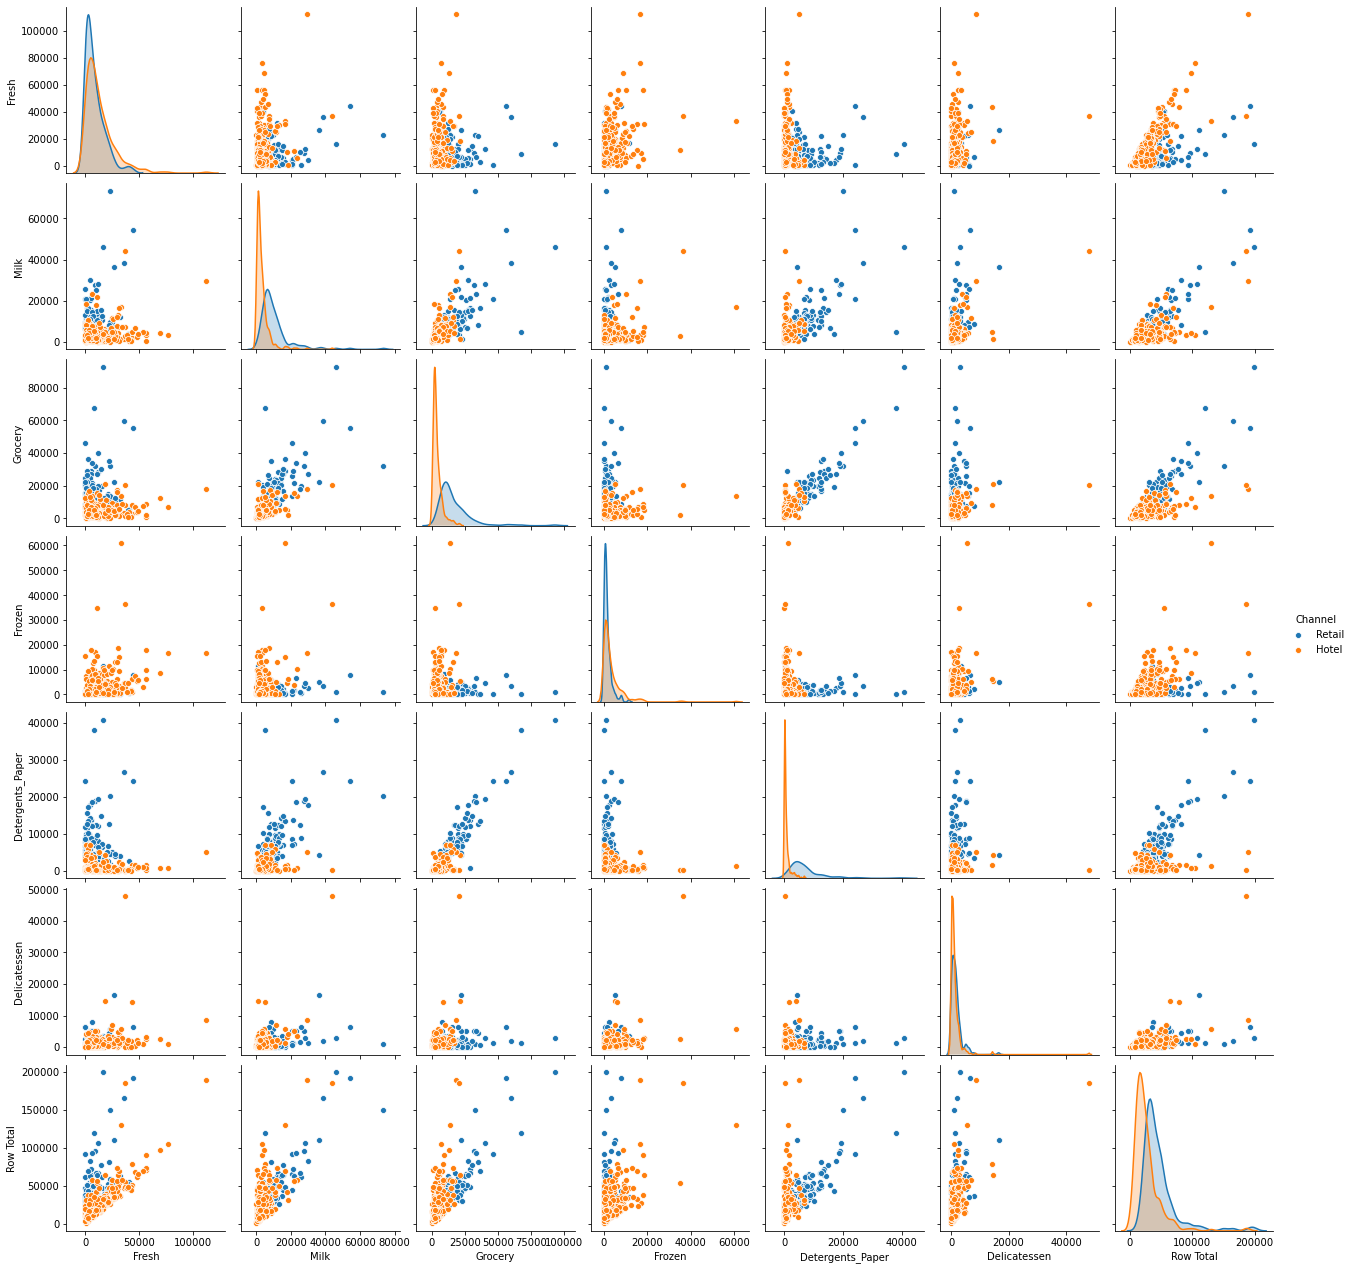

In [123]:
sns.pairplot(df_variety, hue="Channel")

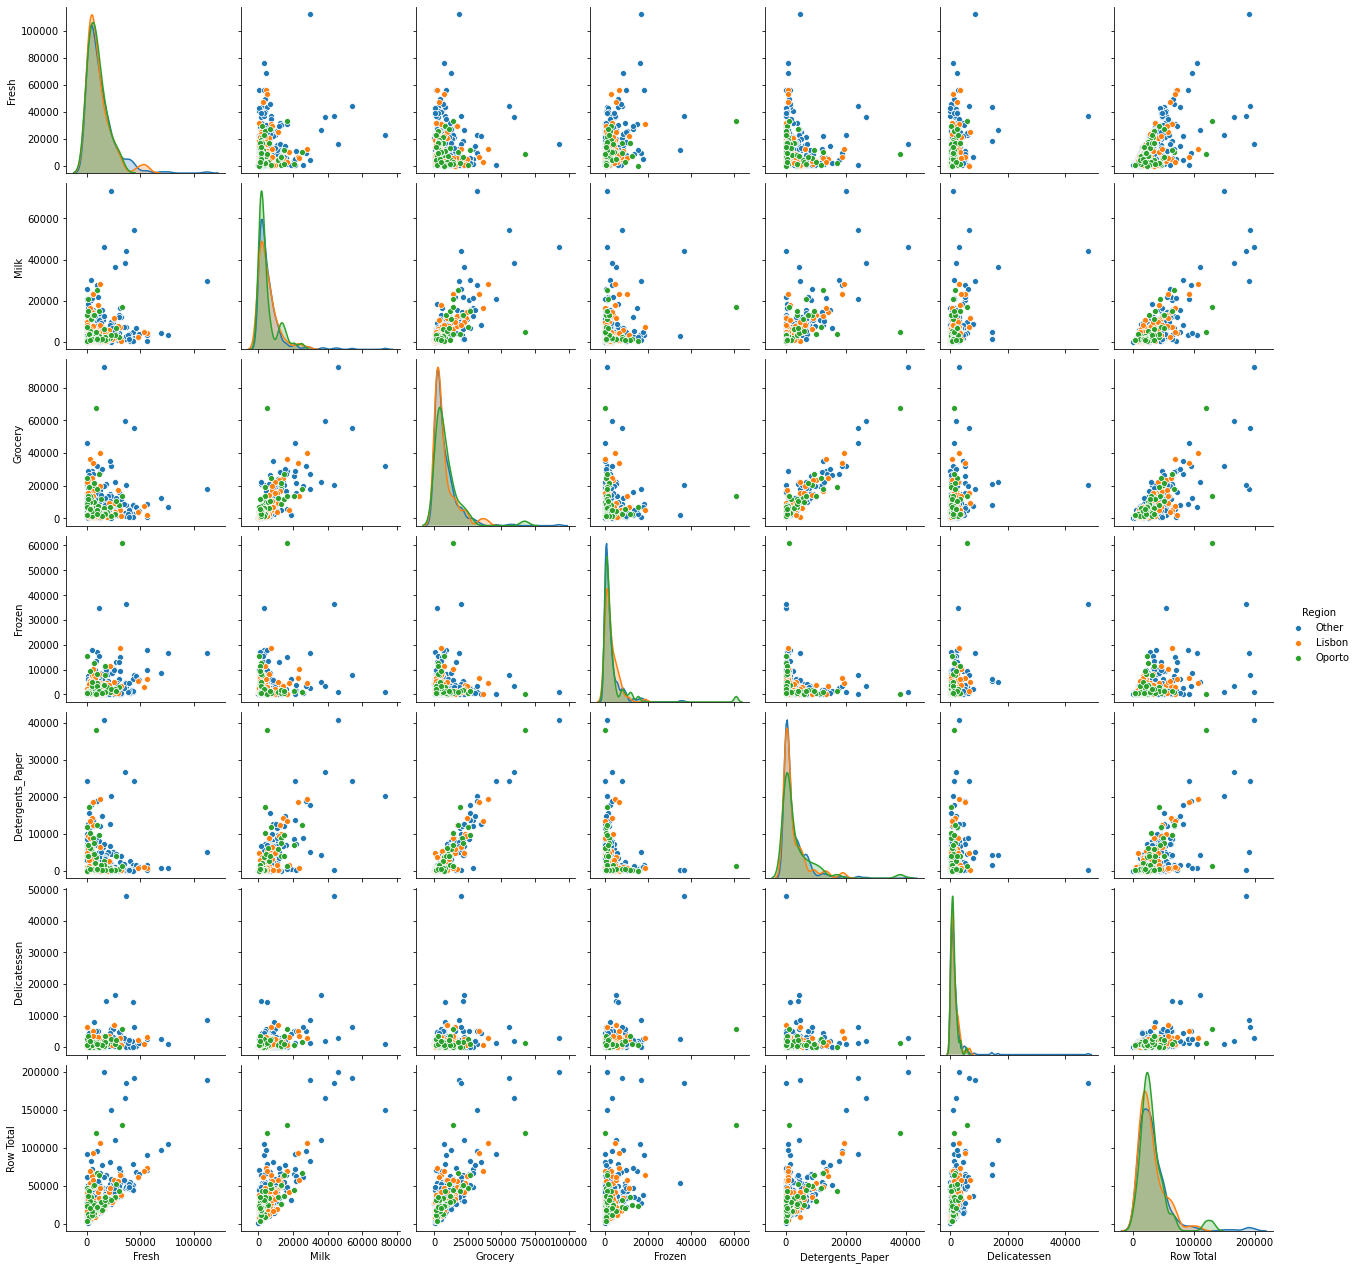

In [124]:
sns.pairplot(df_variety, hue="Region")

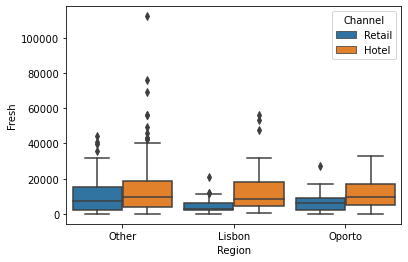

In [115]:
sns.boxplot( y=df["Fresh"], x= df["Region"],hue=df_variety["Channel"], width=0.9)
plt.show()

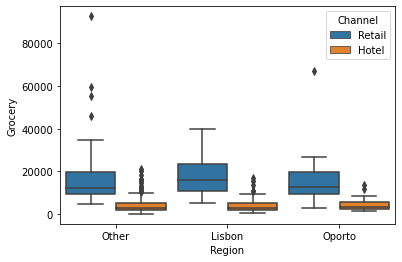

In [117]:
sns.boxplot( y=df["Grocery"], x= df["Region"],hue=df_variety["Channel"], width=0.9)
plt.show()

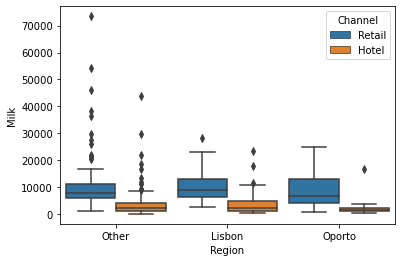

In [118]:
sns.boxplot( y=df_variety["Milk"], x= df_variety["Region"],hue=df_variety["Channel"], width=0.9)
plt.show()

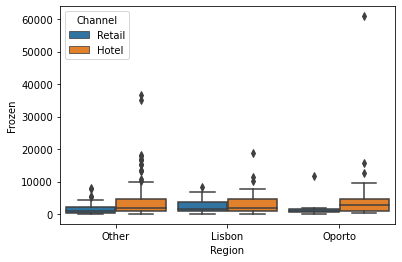

In [126]:
sns.boxplot( y=df_variety["Frozen"], x= df_variety["Region"], hue=df_variety["Channel"], width=0.9)
plt.show()

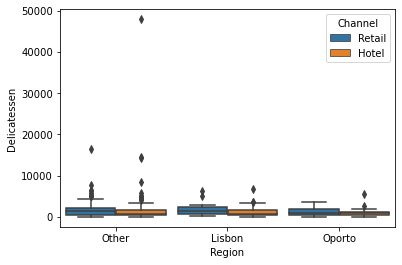

In [127]:
sns.boxplot( y=df_variety["Delicatessen"], x= df_variety["Region"], hue=df_variety["Channel"], width=0.9)
plt.show()

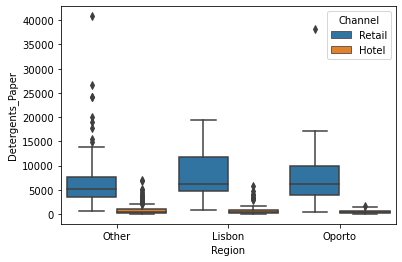

In [128]:
sns.boxplot( y=df_variety["Detergents_Paper"], x= df_variety["Region"],hue=df_variety["Channel"], width=0.9)
plt.show()

In [243]:
df_variety.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Row Total
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690,0.575178
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368,0.776909
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497,0.740680
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947,0.388436
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291,0.633882
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000,0.496849
Row Total,0.575178,0.776909,0.740680,0.388436,0.633882,0.496849,1.000000


In [48]:
df2=pd.read_csv("Survey-1.csv")

In [5]:
df2.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [274]:
df2.isnull().values.any()

False

In [281]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [282]:
df2_crosstab = pd.crosstab(df2['Gender'],
                            df2['Major'], 
                               margins = False)
print(df2_crosstab)

Major   Accounting  CIS  Economics/Finance  International Business  \
Gender                                                               
Female           3    3                  7                       4   
Male             4    1                  4                       2   

Major   Management  Other  Retailing/Marketing  Undecided  
Gender                                                     
Female           4      3                    9          0  
Male             6      4                    5          3  


In [283]:
df2_crosstab = pd.crosstab(df2['Gender'],
                            df2['Grad Intention'], 
                               margins = False)
print(df2_crosstab)

Grad Intention  No  Undecided  Yes
Gender                            
Female           9         13   11
Male             3          9   17


In [284]:
df2_crosstab = pd.crosstab(df2['Gender'],
                            df2['Computer'], 
                               margins = False)
print(df2_crosstab)

Computer  Desktop  Laptop  Tablet
Gender                           
Female          2      29       2
Male            3      26       0


In [286]:
df2_crosstab = pd.crosstab(df2['Gender'],
                            df2['Employment'], 
                               margins = True)
print(df2_crosstab)

Employment  Full-Time  Part-Time  Unemployed  All
Gender                                           
Female              3         24           6   33
Male                7         19           3   29
All                10         43           9   62


In [288]:
P_male = 29/62
print (P_male)

0.46774193548387094


In [289]:
P_female = 33/62
print (P_female)

0.532258064516129


In [9]:
df2_crosstab_gpa = pd.crosstab(df2['Gender'],
                            df2['GPA'],
                               margins = True)
print(df2_crosstab_gpa)

GPA     2.3  2.4  2.5  2.6  2.8  2.9  3.0  3.1  3.2  3.3  3.4  3.5  3.6  3.7  \
Gender                                                                         
Female    1    1    2    0    1    3    5    2    4    3    2    4    1    2   
Male      0    0    4    2    2    1    2    5    2    2    5    2    2    0   
All       1    1    6    2    3    4    7    7    6    5    7    6    3    2   

GPA     3.8  3.9  All  
Gender                 
Female    1    1   33  
Male      0    0   29  
All       1    1   62  


In [14]:
df2_crosstab_salary = pd.crosstab(df2['Gender'],
                            df2['Salary'],
                               margins = True)
print(df2_crosstab_salary)

Salary  25.0  30.0  35.0  37.0  37.5  40.0  42.0  45.0  47.0  47.5  50.0  \
Gender                                                                     
Female     0     5     1     0     1     5     1     1     0     1     5   
Male       1     0     1     1     0     7     0     4     1     0     4   
All        1     5     2     1     1    12     1     5     1     1     9   

Salary  52.0  54.0  55.0  60.0  65.0  70.0  78.0  80.0  All  
Gender                                                       
Female     0     0     5     5     0     1     1     1   33  
Male       1     1     3     3     1     0     0     1   29  
All        1     1     8     8     1     1     1     2   62  


In [19]:
p_female_above_fifty = (18)/33
p_male_above_fifty = (14)/29

print(p_female_above_fifty , p_male_above_fifty)

0.5454545454545454 0.4827586206896552


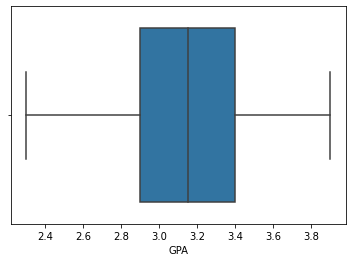

In [23]:
sns.boxplot(df2['GPA'])
plt.show()

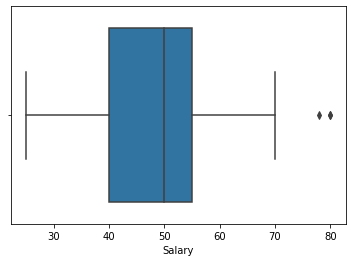

In [24]:
sns.boxplot(df2['Salary'])
plt.show()

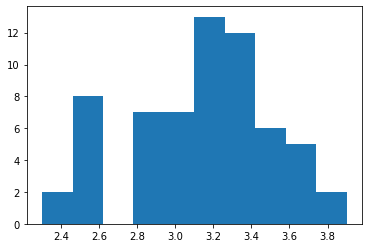

In [49]:
plt.hist(df2['GPA'])
plt.show()

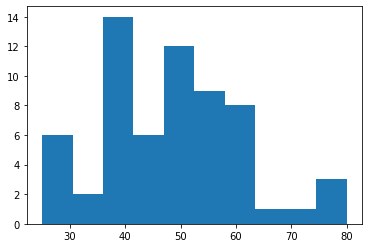

In [25]:
plt.hist(df2['Salary'])
plt.show()

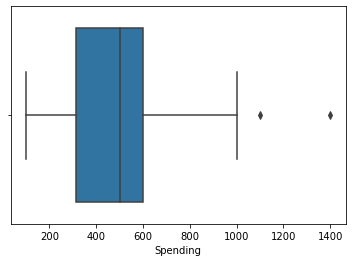

In [26]:
sns.boxplot(df2['Spending'])
plt.show()

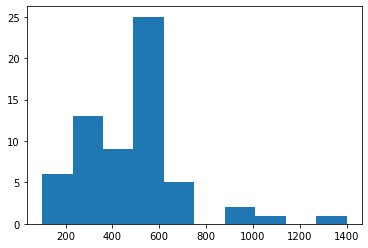

In [27]:
plt.hist(df2['Spending'])
plt.show()

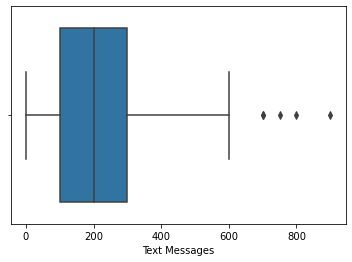

In [29]:
sns.boxplot(df2['Text Messages'])
plt.show()

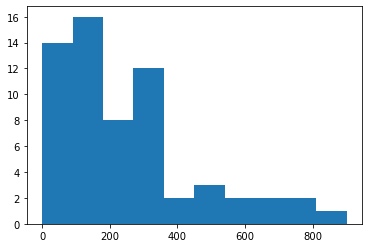

In [51]:
plt.hist(df2['Text Messages'])
plt.show()

In [53]:
#Problem 3
#H0 The mean moisture content in both sets less than equal to 0.35/100 sq ft
#H1 The mean moisture content in both sets Greater than 0.35/100 sq ft
#Since population std is unknown we use T statistics
#Assume Alpha is 0.05
df3=pd.read_csv("A+&+B+shingles.csv")


In [60]:
df3.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [54]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [61]:
df3['A'].isna().sum()

0

In [62]:
df3['B'].isna().sum()

5

In [63]:
#Check for set A 
t_statistic_a, p_value_a = ttest_1samp(df3['A'],0.35,nan_policy='omit')
print("One sample t test for Set A \nt statistic {0} and p statistic {1}".format(t_statistic_a, p_value_a/2))

One sample t test for Set A 
t statistic -1.4735046253382782 and p statistic 0.07477633144907513


In [65]:
#Check for set B 
t_statistic_b, p_value_b = ttest_1samp(df3['B'],0.35,nan_policy='omit')
print("One sample t test for Set B \nt statistic {0} and p statistic {1}".format(t_statistic_b, p_value_b/2))

One sample t test for Set B 
t statistic -3.1003313069986995 and p statistic 0.0020904774003191826


In [66]:
#Two Tailed T Test
# H0: MuA equal to Mu B
# H1: MuA not equal to MuB


t_statistic_twosample, p_value_twosample = ttest_ind(df3['A'], df3['B'],nan_policy='omit')
print("Two sample t test for Set B \nt statistic {0} and p statistic {1}".format(t_statistic_twosample, p_value_twosample))
if p_value_twosample<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

Two sample t test for Set B 
t statistic 1.2896282719661123 and p statistic 0.2017496571835306
accept null hypothesis
